<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/IMDB_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10_000)

In [3]:
X_train.shape

(25000,)

In [4]:
y_train.shape

(25000,)

In [5]:
len(X_train[0])

218

In [6]:
y_train[0]

1

In [7]:
word_idx = imdb.get_word_index()
list(word_idx.keys())[:5]

['fawn', 'tsukino', 'nunnery', 'sonja', 'vani']

In [8]:
type(X_train[0][0])

int

In [9]:
reverse_word_idx = dict(
    [(val, key) for (key, val) in word_idx.items()]
)

In [10]:
print(' '.join([reverse_word_idx.get(i - 3, '?') for i in X_train[0]]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [11]:
y_train[0]

1

In [12]:
# 1 - positive
# 0 - negative

In [13]:
def vectorize_sequences(sequences, dim=10_000):
  res = np.zeros((len(sequences), dim))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      res[i, j] = 1.
  return res

X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [14]:
len(X_train[0])

10000

In [15]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
# here we can see that X_train[0] contains 1st and the 2nd encoded words
# max number of words is 10_000 and max index is 9999 (that's why dim=10_000)
# It's just One Hot encoding

In [17]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [18]:
y_train.shape

(25000,)

In [19]:
X_train.shape

(25000, 10000)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [21]:
model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [22]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'
)

In [23]:
history = model.fit(
    X_train, y_train,
    validation_split=0.3,
    epochs=10,
    batch_size=512
)

Epoch 1/10
35/35 [==============================] - 4s 81ms/step - loss: 0.4711 - accuracy: 0.7949 - val_loss: 0.3305 - val_accuracy: 0.8817
Epoch 2/10
35/35 [==============================] - 2s 44ms/step - loss: 0.2786 - accuracy: 0.8977 - val_loss: 0.2935 - val_accuracy: 0.8809
Epoch 3/10
35/35 [==============================] - 2s 44ms/step - loss: 0.2136 - accuracy: 0.9228 - val_loss: 0.2943 - val_accuracy: 0.8815
Epoch 4/10
35/35 [==============================] - 2s 55ms/step - loss: 0.1774 - accuracy: 0.9358 - val_loss: 0.3151 - val_accuracy: 0.8769
Epoch 5/10
35/35 [==============================] - 2s 55ms/step - loss: 0.1507 - accuracy: 0.9453 - val_loss: 0.2949 - val_accuracy: 0.8857
Epoch 6/10
35/35 [==============================] - 1s 38ms/step - loss: 0.1205 - accuracy: 0.9579 - val_loss: 0.3006 - val_accuracy: 0.8851
Epoch 7/10
35/35 [==============================] - 1s 41ms/step - loss: 0.1085 - accuracy: 0.9628 - val_loss: 0.3217 - val_accuracy: 0.8851
Epoch 8/10
35

In [24]:
import matplotlib.pyplot as plt

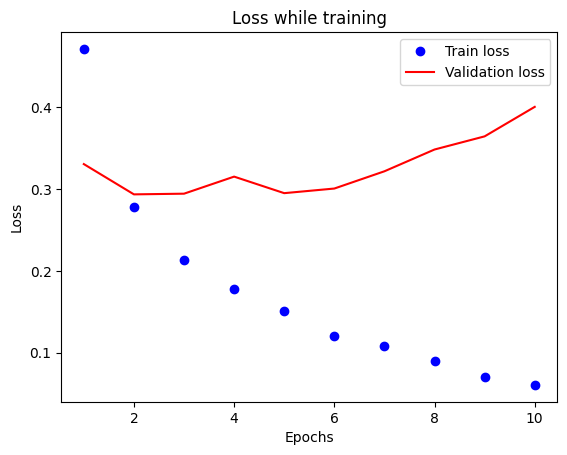

In [25]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss while training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

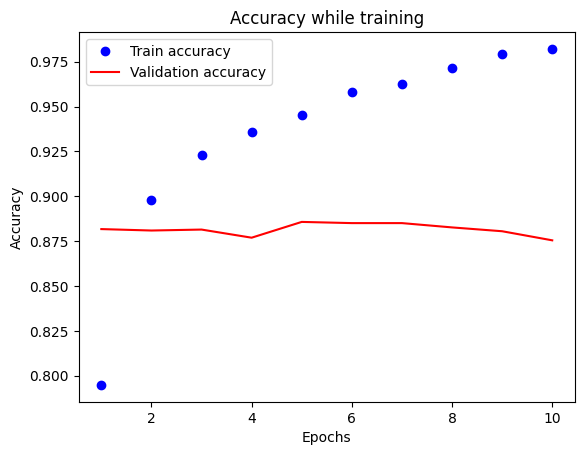

In [26]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Accuracy while training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [27]:
model.predict(X_test)

782/782 [==============================] - 2s 2ms/step


array([[0.09386268],
       [0.99999124],
       [0.00254989],
       ...,
       [0.07381035],
       [0.0134982 ],
       [0.3687793 ]], dtype=float32)